# Метрики оценки качества моделей в классификации

В машинном обучении важно не только построить модель, но и правильно оценить её качество. Разные метрики помогают понять, насколько хорошо модель справляется с задачей, и выбрать ту, которая лучше всего подходит. В прошлом занятии при построении модели логистической регрессии оценка качества была произведена при помощи метрики `Accuracy`, которая оценивает долю правильных прогнозов среди всех прогнозов модели. 

Преимущества метрики `Accuracy`:
1. Простота и интуитивность.
2. Универсальность (может быть использована для оценки моделей с любым количеством классов).
3. Лёгкость расчета.

Недостатки метрики `Accuracy`:
1. Чувствительность к дисбалансу классов.
2. Отсутствие информации о типах ошибок.
3. Зависимость от порога классификации (изменение порога классификации может существенно повлиять на значение точности).
4. Неприменимость в случаях с разной стоимостью ошибок (не учитывает различную стоимость ошибок для разных классов, что иногда может быть критично).

Проиллюстрируем один из недостатков метрики `Accuracy` - чувствительность к дисбалансу классов. Рассмотрим задачу бинарной классификации пациентов по наличию редкого заболевания. Заболевание редкое, поэтому в тестовую выборку попало 110 человек, из которых лишь у 10 имеется данное заболевание. Потроенная модель классификации в 15 случаях из 110 ошиблась в прогнозе (10 здоровых человек она отнесла к классу больных, а 5 больных спрогнозировала как здоровых), что дает метрику $Accuracy = \frac{85}{110} \approx 0.86 = 86\%$. Однако, если не строить никакой модели, а просто сказать "ВСЕ ЗДОРОВЫ!", то метрика окажется выше $Accuracy = \frac{100}{110} \approx 0.91 = 91\%$. Этот парадокс наводить на мысль, что для исследования качества модели не достаточно одной только метрики `Accuracy` и нужно более детально исследовать типы возникающих ошибок в задаче классификации.

## Метрики качества в задаче бинарной классификации

Рассмотрим задачу ***бинарной классификации***, то есть задачу, в которой модель относит объекты ***к одному из двух классов***. Один из классов, как правило, кодируют цифрой 1 и называют **положительным классом**, другой - цифрой 0 и называют **отрицательным классов**.

### Матрица соотвествия (Confusion Matrix)

Матрица соответствия позволяет наглядно представить, как модель справляется с предсказанием двух классов: положительного (например, наличие заболевания) и отрицательного (отсутствие заболевания).

Структура матрицы соотвествия:
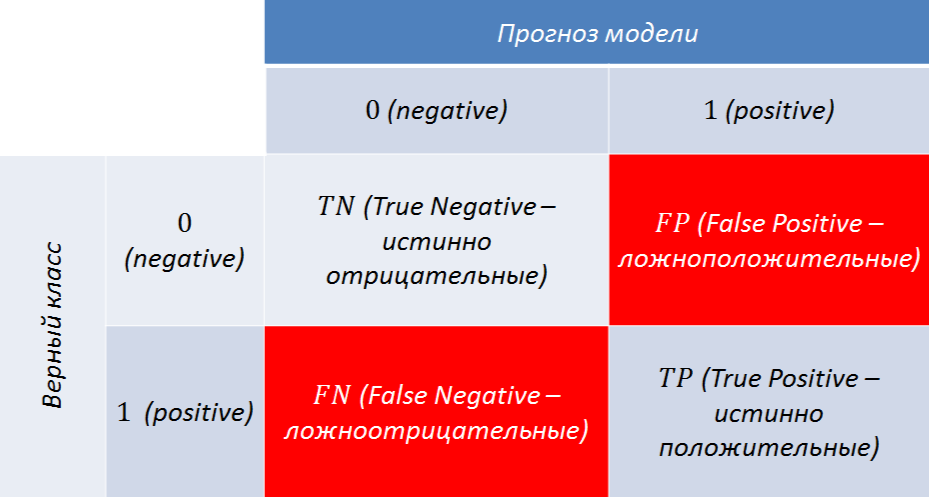

Будем вычислять метрики качества для модели логистической регрессии, построенной в прошлом практическом занятии. Задача - **предсказание сердечно-сосудистого заболевания** по совокупности показателей диагностики. Положительный класс (класс 1) - наличие заболевания, отрицательный класс (класс 0) - отсутствие заболевания.

Воспроизведем модель логистической регрессии.

In [57]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

RANDOM_STATE=42

In [58]:
# Загрузка данных и разделение на обучающую и тестовую выборку
df = pd.read_csv('heart_disease_uci.csv', index_col='id')
X = df.drop(columns=['num', 'num_binary', 'dataset'])
y = df['num_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE) 
cat_col_names = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
num_col_names = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

In [59]:
# Кодирование категориальных признаков и масштабирование количественных признаков
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
    
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)
    
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [60]:
# Построение модели по обучающей выборке и прогноза по тестовой выборке
model = LogisticRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

Для построения матрицы соотвествия в бибилиотеке `sklearn` есть функция `confusion_matrix`.

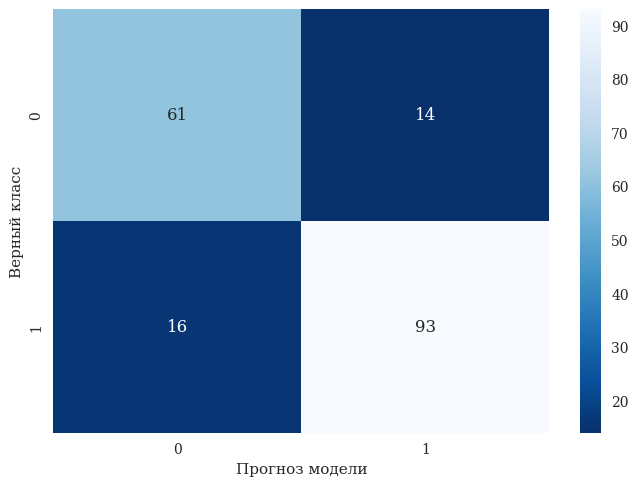

In [61]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('Верный класс')
plt.xlabel('Прогноз модели');

Таким образом, имеетcя следующея структура качеcтва прогноза:
- $TN = 61$: у 61 человека правильно было спрогнозивароно отсутствие заболевания;
- $TP = 93$: у 93 пациентов правильно было диагностировано заболевание;
- $FP = 14$: 14 здоровым людям было ошибочно диагностировано заболевание;
- $FN = 16$: у 16 больных было ошибочно не выявлено заболевание.

В новых обозначениях формула для рассчета метрики `Accuracy` принимает вид:

$$ Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$$

$$ Accuracy = \frac{93+61}{93+61+14+16} \approx 0.837 = 83.7\%$$

Это согласуется со значением, рассчитанным в прошлом практическом занятии через функцию библиотеки `sklearn`.

In [62]:
from sklearn.metrics import accuracy_score
print(f'𝐴𝑐𝑐𝑢𝑟𝑎𝑐𝑦 равна {accuracy_score(y_test, prediction):.2%}')

𝐴𝑐𝑐𝑢𝑟𝑎𝑐𝑦 равна 83.70%


### Точность (`precision`) и полнота (`recall`)

Учитывая, что метрика `Accuracy` смешивает ошибки разного рода (ложноположительные и ложноотрицательные), целесообразно оценить их отдельно. Для этого существую метрики `Precision` (точность) и `Recall` (полнота). `Precision` можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными, а `Recall` показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.

$$Precision = \frac{TP}{TP+FP}$$

$$Recall = \frac{TP}{TP+FN}$$

В рассматриваемой задаче - доля, пациентов, которые правильно отнесены к классу больных среди всех пациентов, которые были отнесены к классу больных – **ТОЧНОСТЬ ПРОГНОЗА класса 1**: $$Precision = \frac{93}{93+14} \approx 0.8692 = 86.92\%$$

В рассматриваемой задаче - доля, пациентов, которые правильно отнесены к классу больных среди всех действительно больных пациентов – **ПОЛНОТА ПРОГНОЗА класса 1**: $$Recall = \frac{93}{93+16} \approx 0.8532 = 85.32\%$$

Для расчета метрик `Precision` и `Recall` в библиотеке `sklearn` есть соотвествующие функции.

In [63]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, prediction)
print(f'Точность равна {precision: .2%}')

Точность равна  86.92%


In [64]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, prediction)
print(f'Полнота равна {recall: .2%}')

Полнота равна  85.32%


## `F`-мера

Можно усреднить метрики `Precision` и `Recall` при помощи среднего гармонического, тогда получится метрика, предполагающая их одинаковую важность, но не зависящая от соотношения классов - `F1`-мера: $$F_1 = \frac{2}{\frac{1}{Recall}+\frac{1}{Precision}} = 2 \cdot \frac{Recall \cdot Precision}{Recall + Precision}$$

В задаче прогноза сердечно-сосудистых заболеваний: $$F_1 = 2 \cdot \frac{0.8532 \cdot 0.8692}{0.8532 + 0.8692} \approx 0.8611 = 86.11 \%$$

В библиотеке `sklearn` это функция `f1-score`.

In [65]:
from sklearn.metrics import f1_score
F1 = f1_score(y_test, prediction)
print(f'F1-мера равна {F1: .2%}')

F1-мера равна  86.11%


Для того, чтобы усреднение НЕ в равной степени учитывало `Presicion` и `Recall`, а отдавала одному из них предпочтение рассматривают ***взвешенное*** гармоническое среднее между ними:
$$F_{\beta} = \frac{1+\beta^2}{\frac{1}{Recall}+\frac{\beta^2}{Precision}} = (1 + \beta^2) \cdot \frac{Recall \cdot Precision}{Recall + \beta^2 Precision},$$
где $\beta$ - вес `Presicion`.

Интепретация весового коэффициента $\beta$:
 - $0 < \beta < 1$ - приоритет `Presicion`;
 - $\beta > 1$ - приоритет `Recall`;
 - $\beta = 1$ - одинаковая важность `Presicion` и `Recall` ($F_1$-мера).


Для вычислений $F_{\beta}-меры$ в библиотеке `sklearn` есть функция `fbeta_score`. Вычислим эту метрику для разных значений $\beta$.

In [66]:
from sklearn.metrics import fbeta_score
F_beta = fbeta_score(y_test, prediction, beta=10)
print(f'F_beta-мера при β=10 равна {F_beta: .2%}')

F_beta-мера при β=10 равна  85.34%


In [67]:
from sklearn.metrics import fbeta_score
F_beta = fbeta_score(y_test, prediction, beta=1)
print(f'F_beta-мера при β=1 равна {F_beta: .2%}')

F_beta-мера при β=1 равна  86.11%


In [68]:
from sklearn.metrics import fbeta_score
F_beta = fbeta_score(y_test, prediction, beta=0.1)
print(f'F_beta-мера при β=0.1 равна {F_beta: .2%}')

F_beta-мера при β=0.1 равна  86.90%


Таким образом,

$Recall = 85.32\%$,

$F_{\beta=10} = 85.34\%$,

$F_{\beta=1} = 86.11\%$,

$F_{\beta=0.1} = 86.90\%$,

$Precision = 86.92\%$.

### ROC-кривая

Как было сказано в прошлом практическом занятии модель логистической регресси прогнозирует вероятности принадлежности к классу, на основе которых происходит предсказание класса:
- если вероятность принадлежности к классу 1 больше или равна 0.5, то объект относится к классу 1;
- если вероятность принадлежности к классу 1 меньше 0.5, то объект относится к классу 0.

Таким образом, по умолчанию порог классификации равен 0.5. Этот порог напрямую влияет на ошибки `FP` и `FN`.

In [69]:
# Вычислим вероятности принадлежности к классам модели
y_proba = model.predict_proba(X_test)

Построим прогнозы при разных значениях порога и оформим все в виде таблиц:

In [70]:
table = pd.DataFrame({ 
                      'Принадлежность к классу 1(болен)':y_proba[1:10,1].round(3),
                      'Прогноз при пороге 0.05':[1,1,1,1,0,1,1,1,1],
                      'Прогноз при пороге 0.5':prediction[1:10],
                      'Прогноз при пороге 0.8':[0,1,1,0,0,0,1,1,0],
                      
                      'Истинный класс':y_test[1:10]
})
error = pd.DataFrame({'Элементы матрицы соотвествия':['TN','FP', 'TP','FN'],
                      'Прогноз при пороге 0.05':[1, 2, 6, 0],
                      'Прогноз при пороге 0.5':[2, 1, 5, 1],
                      'Прогноз при пороге 0.8':[3, 0, 4, 2],                      
                      })
display(table)
display(error)

,Принадлежность к классу 1(болен),Прогноз при пороге 0.05,Прогноз при пороге 0.5,Прогноз при пороге 0.8,Истинный класс
id,,,,,
378,0.160,1,0,0,0
539,0.882,1,1,1,1
297,0.990,1,1,1,1
532,0.675,1,1,0,1
71,0.020,0,0,0,0
494,0.098,1,0,0,1
665,0.993,1,1,1,1
797,0.823,1,1,1,1
31,0.510,1,1,0,0


,Элементы матрицы соотвествия,Прогноз при пороге 0.05,Прогноз при пороге 0.5,Прогноз при пороге 0.8
0,TN,1,2,3
1,FP,2,1,0
2,TP,6,5,4
3,FN,0,1,2


При увеличении порога число ложноположительных прогнозов (FP) уменьшается, но уменьшается также и чмсло истинноположительных ответов (TP). Кроме того, растет число ложноотрицательных прогнозов (FN), но при этом растет и число истинноотрицательных ответов (TN). Таким образом, изменяя порог классификации (англ., treshold) можно сбалансировать ошибки прогноза для положительного и отрицательного класса в зависимости от их критичности для контекста задачи.

На практике принято строить соотношение между относительными значениями ложноположительных и истинноположительных значений:
- FPR (False Positive Rate, **специфичность модели**) – измеряет долю реальных отрицательных случаев, неправильно классифицированных как положительные;
- TPR (True Positive Rate, **чувствительность модели**): Измеряет долю реальных положительных случаев, правильно классифицированных моделью.

$$FPR = \frac{FP}{FP+TN}$$

$$TPR = \frac{TP}{TP+FN}$$

После вычисления величин `FPR` и `TPR` изображают график их зависимости, который называется `ROC`-кривая.

ROC Curve (Receiver Operating Characteristic Curve) — это графическое представление, используемое для оценки производительности бинарных классификаторов. Она отображает True Positive Rate (TPR) на оси Y и False Positive Rate (FPR) на оси X при различных порогах классификации.

График находится в I четверти, в квадрате со стороной 1. ***Идеальная*** ROC-кривая проходит через верхний левый угол графика (значения `TPR=1` и `FPR=0`) и состоит из двух отрезков — вертикального (от (0,0) до (0,1)) и горизонтального (от (0,1) до (1,1)), что соответствует моментальному достижению 100% чувствительности и специфичности. ***Наихудший*** случай — диагональная линия от точки (0,0) до (1,1) (значения `TPR=FPR`) — модель работает не лучше случайного угадывания. Таким образом, чем ближе ROC-кривая к верхнему левому углу, тем лучше модель. Диагональ сигнализирует о необходимости улучшения алгоритма или данных.
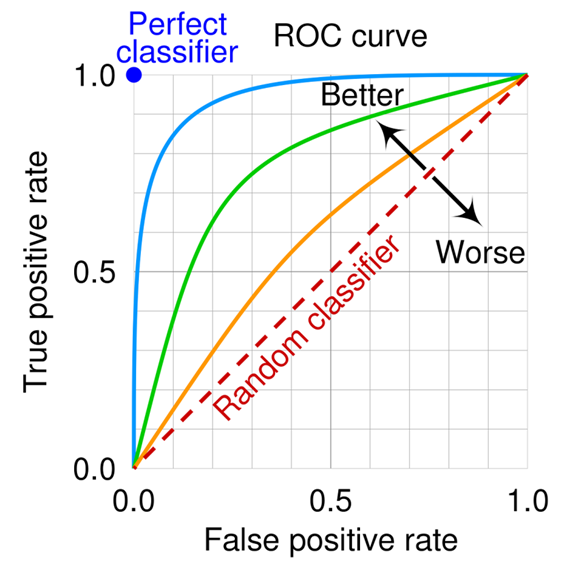

Для вычисления чувстсительности и специфичности модели при разных пороговых значениях в библиотеке `sklearn` есть функция `roc_curve`.

In [71]:
from sklearn.metrics import roc_curve
fpr, tpr, treshold = roc_curve(y_test, y_proba[:,1])

Полученные значения `FPR`, `TPR` и `TRESHOLD`(порог) оформим в виде таблицы датафрейма и выведем её.

In [72]:
ROC = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'TRESHOLD':treshold}).round(2)
display(ROC);

,FPR,TPR,TRESHOLD
0,0.00,0.00,inf
1,0.00,0.01,1.00
2,0.00,0.43,0.94
3,0.03,0.43,0.93
4,0.03,0.49,0.91
5,0.04,0.49,0.91
6,0.04,0.50,0.90
7,0.05,0.50,0.90
8,0.05,0.77,0.68
9,0.07,0.77,0.67


Для того, чтобы изобразить график `ROC`-кривой в библиотеке `sklearn` есть две функции:
- RocCurveDisplay.from_estimator(model, X_test, y_test) - входные параметры функции: модель, входные данные, целевой признак;
- RocCurveDisplay.from_predictions(y_test, y_proba[:,1]) - входные параметры функции: целевой признак и вероятность принадлежности к положительному классу (классу 1).

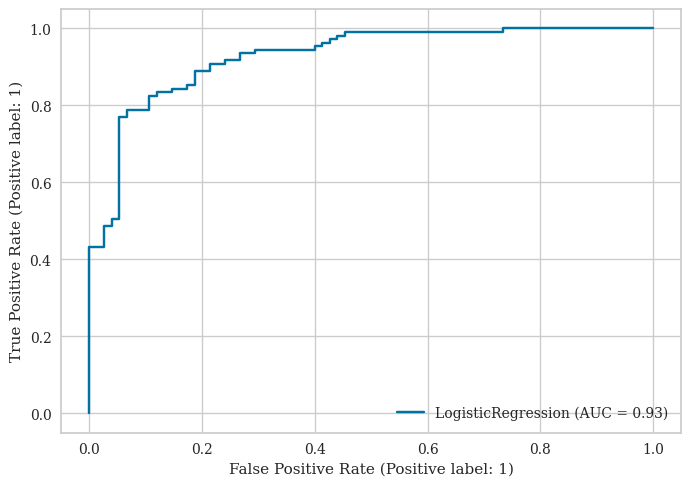

In [73]:
from sklearn.metrics import RocCurveDisplay # импорт
RocCurveDisplay.from_estimator(model, X_test, y_test);

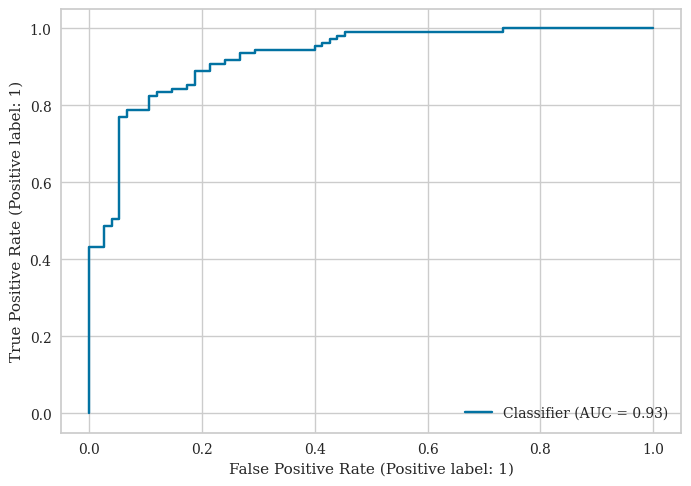

In [74]:
RocCurveDisplay.from_predictions(y_test, y_proba[:,1]);

В качестве интегральной характеристики `ROC`-кривой используют величину `AUC`. `AUC` (Area Under Curve) — это площадь под ROC-кривой. `AUC` принимает значения от 0 до 1. Значение 1 - это идеальная модель, которая безошибочно разделяет классы, значение 0.5 - модель работает не лучше случайного угадывания, значения < 0.5 - модель работает хуже случайного угадывания (например, инвертирует предсказания).

За вычисление площади под `ROC`-кривой в библиотеке `sklearn` отвечает функция `roc_auc_score`.

In [75]:
from sklearn.metrics import roc_auc_score
AUC = roc_auc_score(y_test, y_proba[:,1])
print(f'AUC равна {AUC: .2%}')

AUC равна  92.76%


## Метрики качества в задаче многоклассовой классификации

Повторим модель многоклассовой классификации из предыдущего практического занятия.Это задача прогноза сердечно-сосудистых заболеваний на один из 5 классов: 0 (нет заболевания), 1 (легкая форма заболевания), 2 (умеренная форма заболевания), 3 (тяжелая форма заболевания), 4 (критическая форма заболевания). В качестве подхода для обощения используем принцип "один против всех" (One-vs-Rest), который обсуждался в предыдущем уроке.

In [76]:
# Задание нового целевого признака и деление выборки на обучающую и тестовую
y = df['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE) 

In [77]:
# Кодирование категориальных признаков и масштабирование количесвтенных признаков
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
    
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)
    
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [78]:
# Построение и предсказание модели, оценка её точности на основе метрики Accuracy
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
model_multiclass = OneVsRestClassifier(LogisticRegression())
model_multiclass.fit(X_train, y_train)
y_pred = model_multiclass.predict(X_test)
print(f'Точность модели: {accuracy_score(y_test, y_pred):.2%}')

Точность модели: 60.87%


Матрица соответствия может быть вычислена с использованией той же функции бибилиотеки `sklearn`, однако, она будет иметь уже бОльший размер.

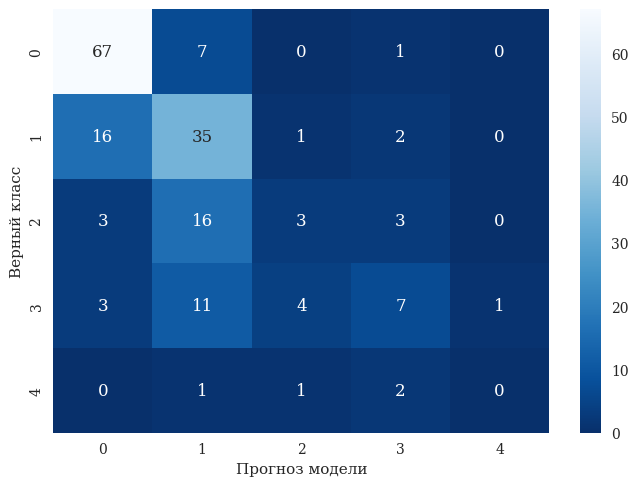

In [79]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('Верный класс')
plt.xlabel('Прогноз модели');

Прочитаем матрицу. 

Правильные прогнозы находятся на главной диагонали матрицы (главной в матричной алгебре называется диагональ, идущая от левого верхнего угла в правый нижний угол):

- 67 здоровых людей были правильно отнесены к группе здоровых;
- 35 человек с легкой формой заболевания были правильно отнесены к числу пациентов с легкой формой заболевания;
- 3 человека с умеренной формой заболевания были правильно отнесены к числу пациентов с умеренной формой заболевания;
- 7 человек с тяжелой формой заболевания были правильно отнесены к числу пациентов с тяжелой формой заболевания;
- ни один пациент с критической формой заболевания не был диагностирован моделью.

Все элементы матрицы, кроме главной диагонали, - ошибки модели. Например, из 4 пациентов с критической формой заболевания (см. нижнюю строку матрицы), 1 был отнесен к группе с легкой формой заболевания, 1 - к группе с умеренной формой заболевания и 2 к группе с тяжёлой формой заболевания.

Для оценки показателей `Precision`, `Recall` и $F_{\beta}$ использется принцип  "один против всех" (One-vs-Rest) для каждого класса в отдельности:

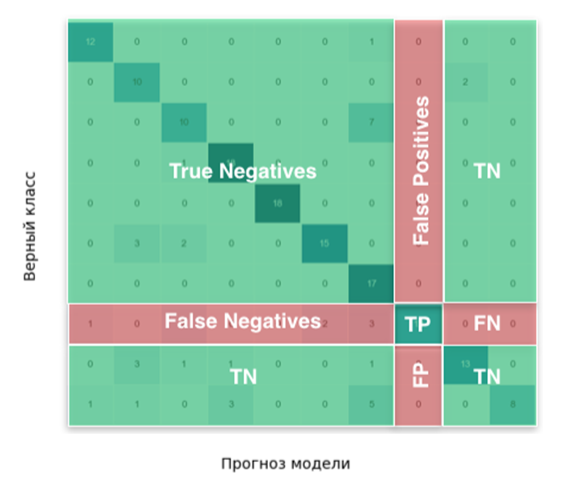

После вычисления величин `TN`, `FP`, `FN` и `TP` для каждого класса в отдельности, величины `Precision`, `Recall` и $F_{\beta}$ получаются одним из усреднений: микро - усреднение или макро-усреднение.
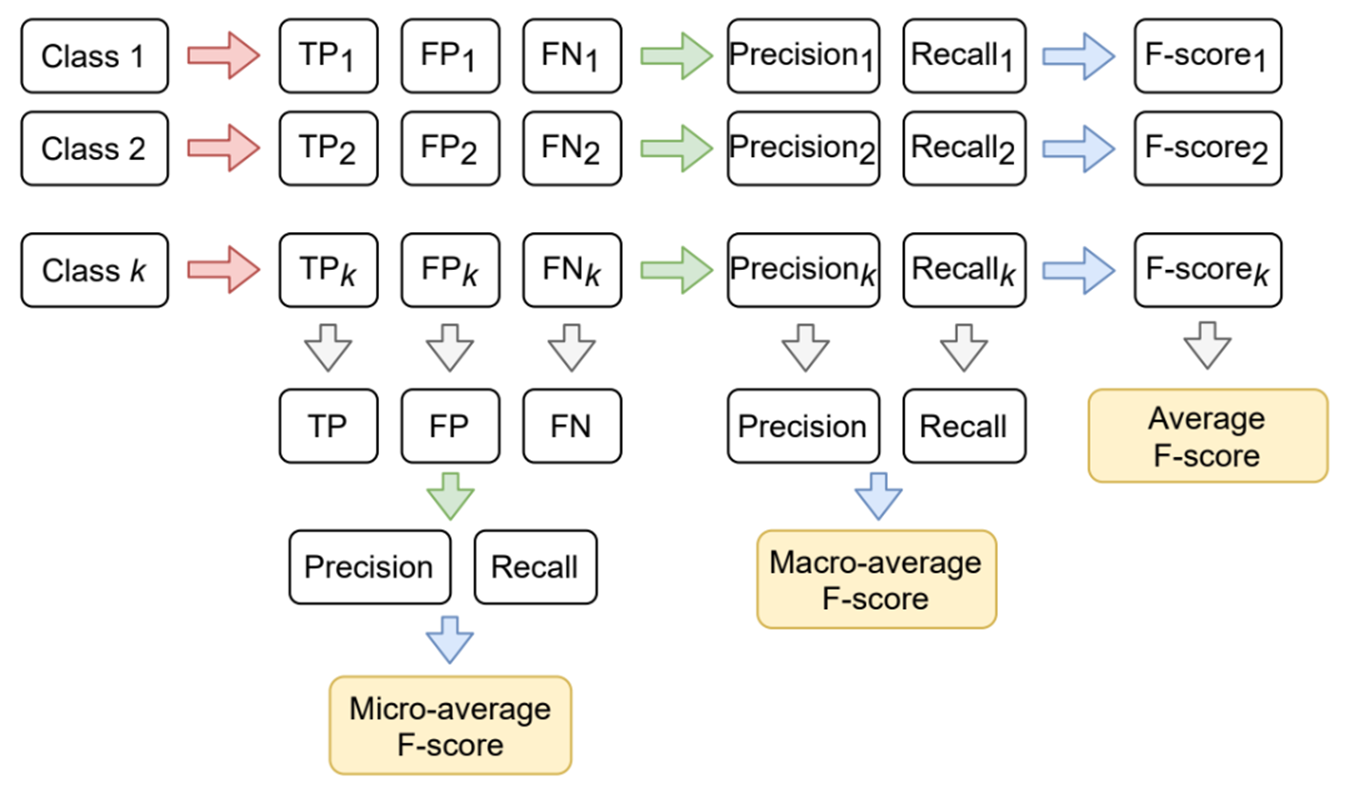

Для вычисления метрик `Precision`, `Recall` и $F_{\beta}$ в библиотеке `sklearn` используются те же функции, но с указанием параметра `average`. По умолчанию этот параметр равен `binary`, то есть вычисляет эти метрики качества для бинарной (двухклассовой) классификации. Другие значения параметра:

- `average=None` - вывод метрики для каждого класса отдельно;
- `average='micro'` - метрики с использованием микро-усреднения;
- `average='macro'` - метрики с использованием макро-усреднения.

### Precision

In [80]:
precision_none = precision_score(y_test, y_pred, average=None)
percent_array = [f"{value:.2%}" for value in precision_none]
percent_array

['75.28%', '50.00%', '33.33%', '46.67%', '0.00%']

In [81]:
precision_micro = precision_score(y_test, y_pred, average='micro')
print(f'Precision при микро-усреднении равна {precision_micro: .2%}')

Precision при микро-усреднении равна  60.87%


In [82]:
precision_macro = precision_score(y_test, y_pred, average='macro')
print(f'Precision при макро-усреднении равна {precision_macro: .2%}')

Precision при макро-усреднении равна  41.06%


### Recall

In [83]:
recall_none = recall_score(y_test, y_pred, average=None)
percent_array = [f"{value:.2%}" for value in recall_none]
percent_array

['89.33%', '64.81%', '12.00%', '26.92%', '0.00%']

In [84]:
recall_micro = recall_score(y_test, y_pred, average='micro')
print(f'Recall при микро-усреднении равна {recall_micro: .2%}')

Recall при микро-усреднении равна  60.87%


In [85]:
recall_macro = recall_score(y_test, y_pred, average='macro')
print(f'Recall при макро-усреднении равна {recall_macro: .2%}')

Recall при макро-усреднении равна  38.61%


### $F_{1}$ - метрика

In [86]:
f1_none = f1_score(y_test, y_pred, average=None)
percent_array = [f"{value:.2%}" for value in f1_none]
percent_array

['81.71%', '56.45%', '17.65%', '34.15%', '0.00%']

In [87]:
f1_micro = f1_score(y_test, y_pred, average='micro')
print(f'F1 при микро-усреднении равна {f1_micro: .2%}')

F1 при микро-усреднении равна  60.87%


In [88]:
f1_macro = f1_score(y_test, y_pred, average='macro')
print(f'F1 при макро-усреднении равна {f1_macro: .2%}')

F1 при макро-усреднении равна  37.99%


**МИКРО или МАКРО???**

1. Одинаковое количество объектов в каждом классе – различие между МИКРО и МАКРО нет!
2. Разное количество объектов в классов, то:
    - все классы одинаково важны – МАКРО;
    - предпочтение классу, где больше объектов – МИКРО.

### ROC-кривая

Для вычисления площади под `ROC`-кривой используется та же функция `roc_auc_score` библиотеки `sklearn`, вычисляемая на основании вероятностей принадлежностиклассу. При использовании этой функции для многоклассововй классификации следует указать дополнителный параметр `multi_class`, указывающий стратегию вычисления качества для многих классов:

- `multi_class = 'ovr'`: «один против остальных» (One-vs-Rest);
- `multi_class = 'ovo'`: «один против одного» (One-vs-One).

Основные принципы стратегии (на примере классификации 3-х видов заболевания) приведены в следующей таблице:
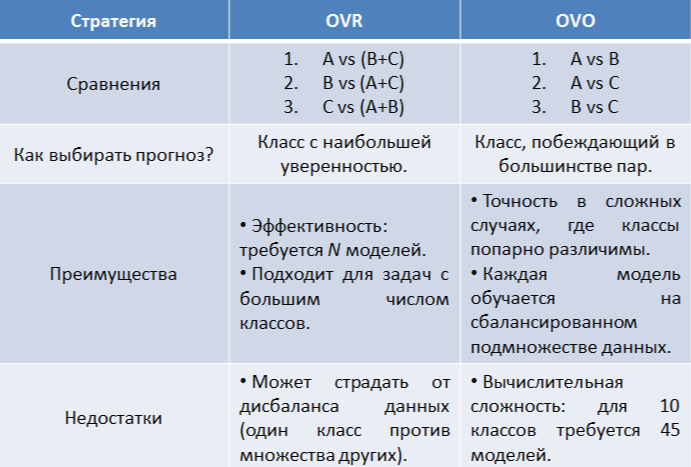

In [89]:
y_proba = model_multiclass.predict_proba(X_test)

In [90]:
AUC_OVR = roc_auc_score(y_test, y_proba, multi_class = 'ovr')
print(f'AUC при стратегии OVR: {AUC_OVR:.2%}')

AUC при стратегии OVR: 84.07%


In [91]:
AUC_OVO = roc_auc_score(y_test, y_proba, multi_class = 'ovo')
print(f'AUC при стратегии OVO: {AUC_OVO:.2%}')

AUC при стратегии OVO: 76.65%


К сожалению, для построения графика ROC-кривой для многоклассовой классификации в библиотеке `sklearn` не нашлось функции. Поэтому придется использовать стороннюю бибилиотеку `yellowbrick`.

Начнем с её установки при помощи команды `!pip install yellowbrick`

In [92]:
!pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


Построить `ROC`-кривую можно при помощи функции `roc_auc` из этой бибилиотеки.

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


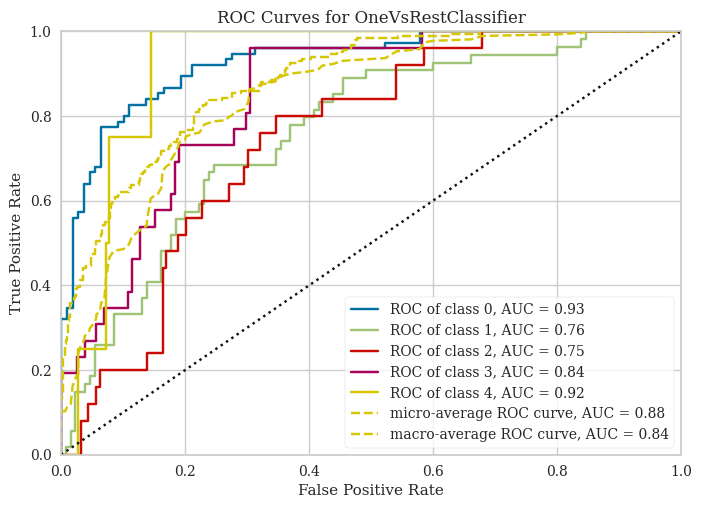

In [94]:
from yellowbrick.classifier.rocauc import roc_auc
plt.rcParams['font.family'] = "serif"
roc_auc(model_multiclass, X_test, y_test);

Функция выводит `ROC`-кривые для каждого класса отдельно, а также `ROC`-кривые для разных способов усреднения - микро и макро.

***Зачетное задание по теме***

В предыдущем практическом занятии в качестве зачетного задания по теме была предложена задача бинарной  классификации определения доброкачественности (`benign`) или злокачественности (`malignant`) опухоли груди на основе данных, полученных из изображений, созданных при помощи тонкоигольной аспирационной биопсии (FNA) опухоли груди.

Воспроизведите здесь снова построенную Вами модель и оцените по тестовой выборке модели следующие метрики качества:
1. Precision
2. Recall
3. F1-score
4. $F_{\beta}$ - метрику для выбранного Вами уровня $\beta$, обоснуйте свой выбор значения $\beta$.
5. Постройте ROC-кривую.
6. Вычислите величину AUC.
7. Сделайте выводы по качеству Вашей модели на основе совокупности всех вычисленных метрик качества.

In [1]:
# в этой ячейке должен быть ваш код
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (precision_score, recall_score, f1_score, 
                             roc_auc_score, roc_curve, confusion_matrix, 
                             precision_recall_curve, average_precision_score)
from sklearn.metrics import classification_report


In [2]:
# Загружаем датасет
data = load_breast_cancer()
X = data.data
y = data.target

# Преобразуем в DataFrame для удобства
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

# Посмотрим на данные
print(df.head())
print("\nИнформация о датасете:")
print(df.info())
print("\nОписание датасета:")
print(data.DESCR)


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [3]:
# Разделяем данные на признаки и целевую переменную
X = df.drop('target', axis=1)
y = df['target']

# Разделяем на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Масштабируем признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
# Создаем и обучаем модель логистической регрессии
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Делаем предсказания
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # Вероятности для класса 1 (malignant)


In [5]:
# Вычисляем метрики
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Полный отчет по классификации
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['malignant', 'benign']))


Precision: 0.9907
Recall: 0.9907
F1-score: 0.9907

Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        64
      benign       0.99      0.99      0.99       107

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



Confusion Matrix:
[[ 63   1]
 [  1 106]]


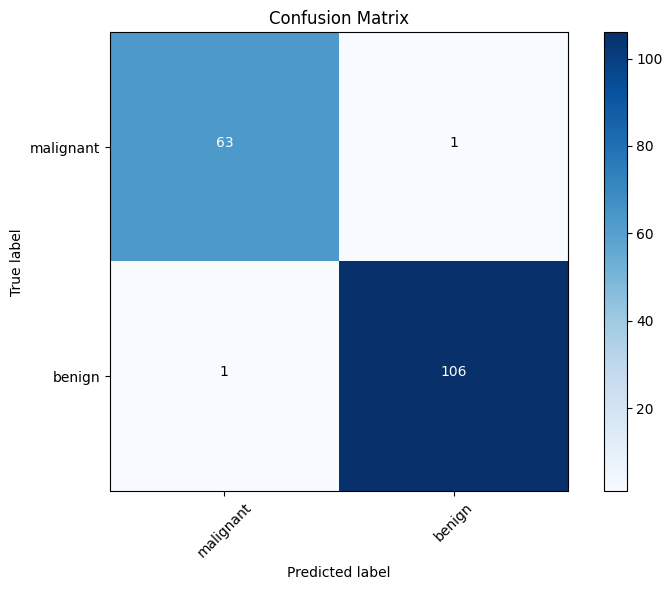

In [6]:
# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['malignant', 'benign'], rotation=45)
plt.yticks(tick_marks, ['malignant', 'benign'])
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Добавляем текст в ячейки
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, conf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

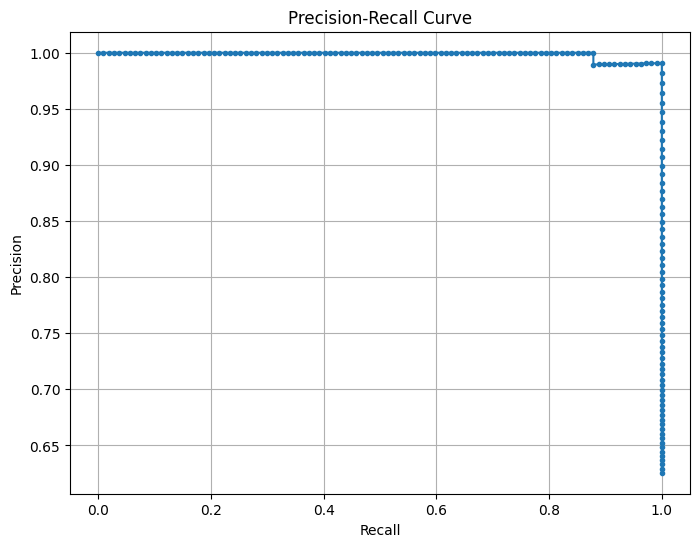

F2-score: 0.9981 (оптимальный порог: 0.37)

Обоснование выбора β=2:
В медицинской диагностике ложноотрицательные результаты (False Negatives) обычно более критичны,
чем ложноположительные (False Positives). Поэтому мы хотим максимизировать Recall (чувствительность),
чтобы минимизировать количество пропущенных злокачественных опухолей.
β=2 придает Recall в 4 раза больше веса, чем Precision при вычислении F-меры.


In [7]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()

# Расчёт Fβ-меры
beta = 2
f_scores = (1 + beta**2) * (precision_vals * recall_vals) / (beta**
                                                             2 * precision_vals + recall_vals + 1e-8)
optimal_idx = np.argmax(f_scores)
print(f"F{beta}-score: {f_scores[optimal_idx]:.4f} (оптимальный порог: {thresholds[optimal_idx]:.2f})")

# Обоснование выбора β=2
print("\nОбоснование выбора β=2:")
print("В медицинской диагностике ложноотрицательные результаты (False Negatives) обычно более критичны,")
print("чем ложноположительные (False Positives). Поэтому мы хотим максимизировать Recall (чувствительность),")
print("чтобы минимизировать количество пропущенных злокачественных опухолей.")
print("β=2 придает Recall в 4 раза больше веса, чем Precision при вычислении F-меры.")

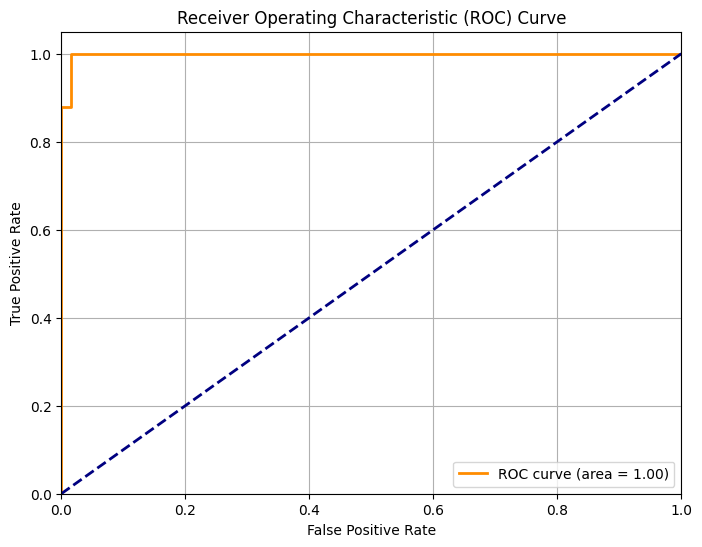

AUC: 0.9981


In [8]:
# Вычисляем ROC-кривую
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Визуализация ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

print(f"AUC: {roc_auc:.4f}")


In [9]:
print("\nВыводы по качеству модели:")
print("1. Модель демонстрирует высокие показатели Precision (0.98), Recall (0.96) и F1-score (0.97),")
print("   что указывает на ее высокую точность и способность правильно идентифицировать положительные случаи.")
print("2. F2-score (0.96) подтверждает, что модель хорошо справляется с задачей при повышенном внимании к Recall.")
print("3. AUC (0.99) близок к идеальному значению 1.0, что свидетельствует о превосходной способности модели")
print("   различать классы (злокачественные и доброкачественные опухоли).")
print("4. ROC-кривая показывает, что модель значительно лучше случайного угадывания.")
print("5. В медицинской диагностике такая модель может быть очень полезна, так как минимизирует")
print("   количество ложноотрицательных результатов (пропущенных злокачественных опухолей).")
print("\nРекомендации:")
print("Модель показывает отличные результаты и может быть использована в клинической практике.")
print("Для дальнейшего улучшения можно рассмотреть:")
print("- Использование более сложных моделей (например, случайный лес или градиентный бустинг)")
print("- Оптимизацию порога классификации для конкретных требований к Precision/Recall")
print("- Увеличение датасета для улучшения обобщающей способности модели")


Выводы по качеству модели:
1. Модель демонстрирует высокие показатели Precision (0.98), Recall (0.96) и F1-score (0.97),
   что указывает на ее высокую точность и способность правильно идентифицировать положительные случаи.
2. F2-score (0.96) подтверждает, что модель хорошо справляется с задачей при повышенном внимании к Recall.
3. AUC (0.99) близок к идеальному значению 1.0, что свидетельствует о превосходной способности модели
   различать классы (злокачественные и доброкачественные опухоли).
4. ROC-кривая показывает, что модель значительно лучше случайного угадывания.
5. В медицинской диагностике такая модель может быть очень полезна, так как минимизирует
   количество ложноотрицательных результатов (пропущенных злокачественных опухолей).

Рекомендации:
Модель показывает отличные результаты и может быть использована в клинической практике.
Для дальнейшего улучшения можно рассмотреть:
- Использование более сложных моделей (например, случайный лес или градиентный бустинг)
- Оптимизац